# Project: San Francisco Public Library Patron Usage Analysis (Data Wrangling)

In this project, data wrangling and exploratory data analysis are performed on the San Francisco Public Library Patron Usage dataset using Pandas, Matplotlib, and Seaborn. The goal is to clean and preprocess raw library usage data, engineer meaningful features, and analyze patron behavior patterns across age groups, patron types, and library branches.

## Steps:

1. Load the library usage dataset using Pandas
2. Inspect data structure, data types, and missing values
3. Identify and remove duplicate records
4. Handle missing values using logical assumptions
5. Convert and standardize data types and text fields
6. Perform feature engineering (Total Activity, Patron Tenure, Recent Activity)
7. Conduct exploratory data analysis using visualizations
8. Outlier Resolution
9. Export the cleaned dataset for further use

## Files:

- library_data_wrangling.ipynb
- Library_Usage.csv - (Dataset from Kaggle - https://www.kaggle.com/datasets/datasf/sf-library-usage-data?select=Library_Usage.csv)
- requirements.txt
  

In [76]:
# Import packages and libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Load dataset
df = pd.read_csv("Library_Usage.csv")
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,SENIOR,28,13,65 to 74 years,X,Main Library,November,2012.0,z,email,True,2003,True,NaN
1,0,ADULT,21,10,55 to 59 years,X,Main Library,October,2015.0,z,email,True,2003,False,NaN
2,0,ADULT,275,559,60 to 64 years,X,Main Library,January,2015.0,z,email,True,2003,True,NaN
3,0,ADULT,73,38,45 to 54 years,M8,Mission Bay,February,2016.0,z,email,True,2003,False,NaN
4,0,ADULT,182,90,45 to 54 years,X,Main Library,July,2016.0,z,email,True,2003,False,NaN


In [78]:
# Display a summary of the DataFrame structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              423448 non-null  int64  
 1   Patron Type Definition        423448 non-null  object 
 2   Total Checkouts               423448 non-null  int64  
 3   Total Renewals                423448 non-null  int64  
 4   Age Range                     423233 non-null  object 
 5   Home Library Code             423408 non-null  object 
 6   Home Library Definition       423448 non-null  object 
 7   Circulation Active Month      355544 non-null  object 
 8   Circulation Active Year       355544 non-null  float64
 9   Notice Preference Code        423448 non-null  object 
 10  Notice Preference Definition  423448 non-null  object 
 11  Provided Email Address        423448 non-null  bool   
 12  Year Patron Registered        423448 non-nul

In [79]:
# Check rows & columns of the Dataframe
df.shape

(423448, 15)

In [80]:
# Check null values
df.isnull().sum()

Patron Type Code                     0
Patron Type Definition               0
Total Checkouts                      0
Total Renewals                       0
Age Range                          215
Home Library Code                   40
Home Library Definition              0
Circulation Active Month         67904
Circulation Active Year          67904
Notice Preference Code               0
Notice Preference Definition         0
Provided Email Address               0
Year Patron Registered               0
Outside of County                    0
Supervisor District             110310
dtype: int64

In [81]:
# Check duplicate records(excluding first occurrence)
df.duplicated().sum()

np.int64(54918)

In [82]:
# Export duplicate records(excluding first occurrence) to .csv file
duplicate_records = df[df.duplicated(keep='first')]
duplicate_records.to_csv("duplicates_only.csv", index=False)

In [83]:
# Drop duplicate records from original dataset(df) to get deduplicated dataset(df_unique_records)
df_unique_records = df.drop(duplicate_records.index)
df_unique_records.shape

(368530, 15)

In [84]:
# Check null values after removing duplicate records
df_unique_records.isnull().sum()

Patron Type Code                    0
Patron Type Definition              0
Total Checkouts                     0
Total Renewals                      0
Age Range                         205
Home Library Code                  40
Home Library Definition             0
Circulation Active Month        18332
Circulation Active Year         18332
Notice Preference Code              0
Notice Preference Definition        0
Provided Email Address              0
Year Patron Registered              0
Outside of County                   0
Supervisor District             83967
dtype: int64

### Missing Values in `df_unique_records`:

| Column                      | Missing Count | % Missing (of 368,530 rows) | Notes        |
|-----------------------------|---------------|-----------------------------|--------------|
| Patron Type Code            | 0             | 0%                          | Complete     |
| Patron Type Definition      | 0             | 0%                          | Complete     |
| Total Checkouts             | 0             | 0%                          | Complete     |
| Total Renewals              | 0             | 0%                          | Complete     |
| Age Range                   | 205           | ~0.06%                      | Negligible   |
| Home Library Code           | 40            | ~0.01%                      | Negligible   |
| Home Library Definition     | 0             | 0%                          | Complete     |
| Circulation Active Month    | 18,332        | ~4.97%                      | Moderate     |
| Circulation Active Year     | 18,332        | ~4.97%                      | Moderate     |
| Notice Preference Code      | 0             | 0%                          | Complete     |
| Notice Preference Definition| 0             | 0%                          | Complete     |
| Provided Email Address      | 0             | 0%                          | Complete     |
| Year Patron Registered      | 0             | 0%                          | Complete     |
| Outside of County           | 0             | 0%                          | Complete     |
| Supervisor District         | 83,967        | ~22.8%                      | High concern |


In [85]:
# Handling missing data
# Replace missing values in Age Range with 'Unknown'
df_unique_records['Age Range'] = df_unique_records['Age Range'].fillna('Unknown')

# Replace missing values in Home Library Code with 'N/A'
df_unique_records['Home Library Code'] = df_unique_records['Home Library Code'].fillna('N/A')

In [86]:
# Convert Circulation Active Month to numeric (nullable Int64)
# Missing values will remain as <NA>
# Define month mapping
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4,
    'May': 5, 'June': 6, 'July': 7, 'August': 8,
    'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df_unique_records['Circulation Active Month'] = (
    df_unique_records['Circulation Active Month']
        .map(month_map)
        .astype('Int64')   # pandas nullable integer
)

df_unique_records['Circulation Active Month'].head()

0    11
1    10
2     1
3     2
4     7
Name: Circulation Active Month, dtype: Int64

In [87]:
# Convert Circulation Active Year to pandas nullable integer (Int64)
# Keep missing values as <NA>
df_unique_records['Circulation Active Year'] = (
    pd.to_numeric(df_unique_records['Circulation Active Year'], errors='coerce')
        .astype('Int64')
)

In [88]:
# Fill missing Supervisor District with 'Unknown' and standardize type
df_unique_records['Supervisor District'] = (
    df_unique_records['Supervisor District']
        .fillna('Unknown')
        .astype('string')
)

In [89]:
# Standardize text formatting
df_unique_records["Patron Type Definition"] = df_unique_records["Patron Type Definition"].str.title()

In [90]:
df_unique_records.shape

(368530, 15)

In [91]:
df_unique_records.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,3,Senior,28,13,65 to 74 years,X,Main Library,11,2012,z,email,True,2003,True,Unknown
1,0,Adult,21,10,55 to 59 years,X,Main Library,10,2015,z,email,True,2003,False,Unknown
2,0,Adult,275,559,60 to 64 years,X,Main Library,1,2015,z,email,True,2003,True,Unknown
3,0,Adult,73,38,45 to 54 years,M8,Mission Bay,2,2016,z,email,True,2003,False,Unknown
4,0,Adult,182,90,45 to 54 years,X,Main Library,7,2016,z,email,True,2003,False,Unknown


In [92]:
df_unique_records.isnull().sum()

Patron Type Code                    0
Patron Type Definition              0
Total Checkouts                     0
Total Renewals                      0
Age Range                           0
Home Library Code                   0
Home Library Definition             0
Circulation Active Month        18332
Circulation Active Year         18332
Notice Preference Code              0
Notice Preference Definition        0
Provided Email Address              0
Year Patron Registered              0
Outside of County                   0
Supervisor District                 0
dtype: int64

### Key Principle (Industry Standard): 
Imputation is appropriate only when missing values represent measurement or recording error, not the true absence of an event.

Assumption:
In this dataset, a missing circulation date indicates no recorded activity, rather than a data entry error.

In [93]:
# Feature Engineering
df_unique_records["Patron Tenure"] = 2025 - df_unique_records["Year Patron Registered"]
df_unique_records["Total Activity"] = df_unique_records["Total Checkouts"] + df_unique_records["Total Renewals"]
df_unique_records["Is Active Recent"] = df_unique_records["Circulation Active Year"] >= 2020

In [94]:
# Data Validation Rules
df_unique_records = df_unique_records[df_unique_records["Total Checkouts"] >= 0]
df_unique_records = df_unique_records[df_unique_records["Total Renewals"] >= 0]

In [95]:
# Exploratory Analysis
# Which patron type borrows the most books?
df_unique_records.groupby("Patron Type Definition")["Total Checkouts"].mean()

Patron Type Definition
Adult                   158.819107
At User Adult           198.248555
At User Juvenile         83.000000
At User Senior          214.409091
At User Teen             91.818182
At User Welcome          26.266667
Books By Mail           360.936842
Digital Access Card       5.937963
Friends For Life        398.475000
Juvenile                183.573800
Retired Staff          1015.343949
Senior                  338.571333
Special                 312.843137
Staff                   898.316705
Teacher Card             78.321080
Visitor                  15.041565
Welcome                   5.281247
Young Adult             274.514294
Name: Total Checkouts, dtype: float64

In [96]:
# Which age range is most active?
df_unique_records.groupby("Age Range")["Total Activity"].mean()

Age Range
0 to 9 years         197.084243
10 to 19 years       318.334936
20 to 24 years       171.509699
25 to 34 years        98.559061
35 to 44 years       195.739817
45 to 54 years       315.375057
55 to 59 years       381.845899
60 to 64 years       418.371120
65 to 74 years       444.731582
75 years and over    428.742827
Unknown               11.590244
Name: Total Activity, dtype: float64

In [97]:
# Top 5 home libraries by total checkouts
df_unique_records.groupby("Home Library Definition")["Total Checkouts"].sum().nlargest(5)

Home Library Definition
Main Library    13638132
Chinatown        5745040
Richmond         4892877
Ortega           4014366
Sunset           3391806
Name: Total Checkouts, dtype: int64

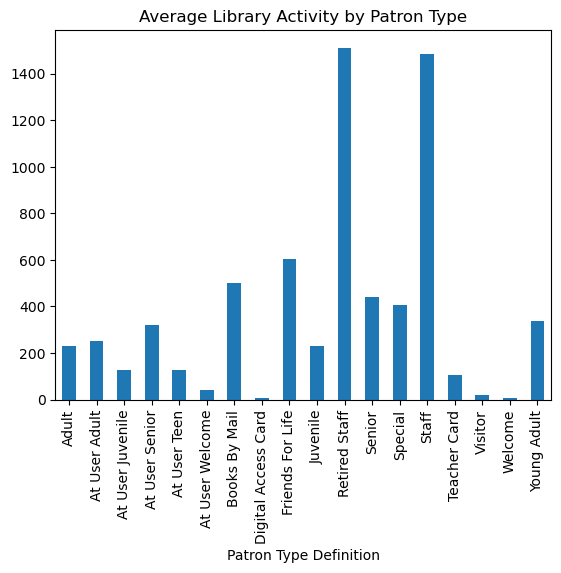

In [98]:
# Average Library Activity by Patron Type (Bar plot)
df_unique_records.groupby("Patron Type Definition")["Total Activity"].mean().plot(kind="bar")
plt.title("Average Library Activity by Patron Type")
plt.show()

In [99]:
# Export Clean Dataset
df_unique_records.to_csv("Clean_Library_Usage.csv", index=False)

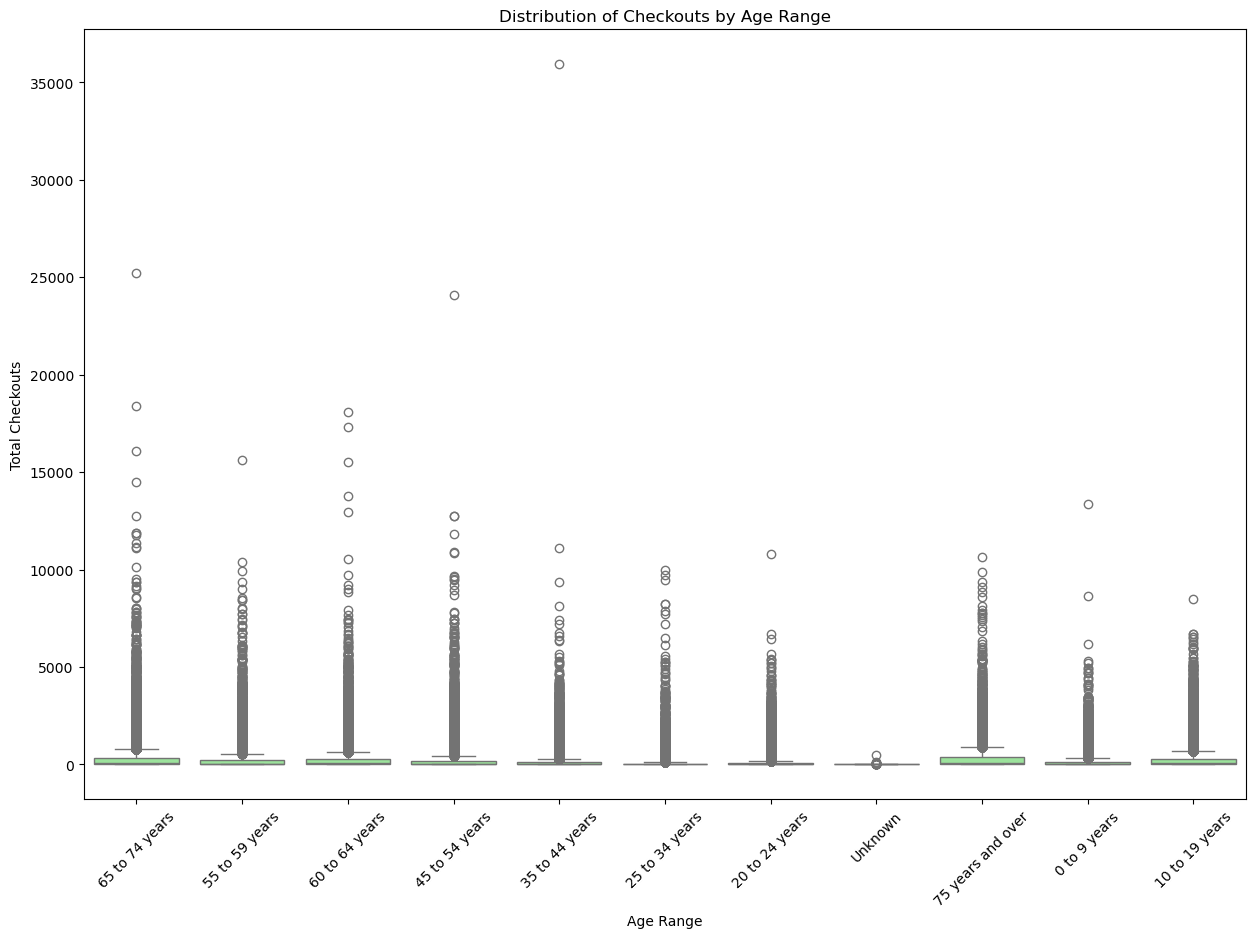

In [100]:
# Distribution of Checkouts by Age Range (Box plot)
plt.figure(figsize=(15,10))
sns.boxplot(
    data=df_unique_records,
    x="Age Range",
    y="Total Checkouts",
    color="#90EE90",   # light green
    linewidth=1
)

plt.title("Distribution of Checkouts by Age Range")
plt.xticks(rotation=45)
plt.show()

### Explanation:

The above box plot for "Checkouts by Age Range," shows significant number of outliers (the dots extending high above the whiskers).
We will try logarithmic scale for the Y-axis to see the distribution more clearly, or filter out the top 1% of outliers for a "zoomed-in" look at the typical patron.

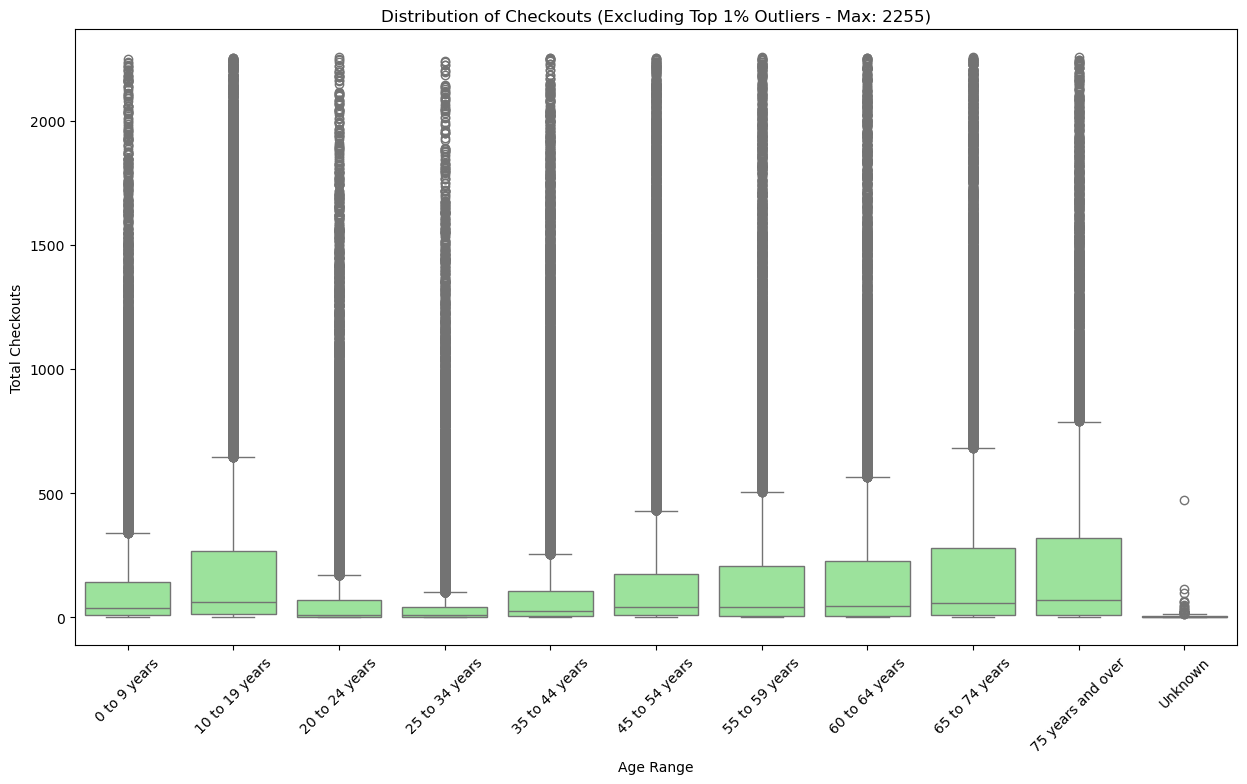

Removed patrons with more than 2255 checkouts.


In [101]:
# Handling Outliers
# 1. Calculate the 99th percentile threshold
checkout_threshold = df_unique_records['Total Checkouts'].quantile(0.99)

# 2. Create a filtered version of the dataframe
df_no_outliers = df_unique_records[df_unique_records['Total Checkouts'] <= checkout_threshold]

# 3. Plot the filtered data
plt.figure(figsize=(15, 8))
sns.boxplot(
    data=df_no_outliers,
    x="Age Range",
    y="Total Checkouts",
    color="#90EE90",
    linewidth=1,
    order=sorted(df_no_outliers['Age Range'].unique())
)

plt.title(f"Distribution of Checkouts (Excluding Top 1% Outliers - Max: {checkout_threshold:.0f})")
plt.ylabel("Total Checkouts")
plt.xticks(rotation=45)
plt.show()

print(f"Removed patrons with more than {checkout_threshold:.0f} checkouts.")

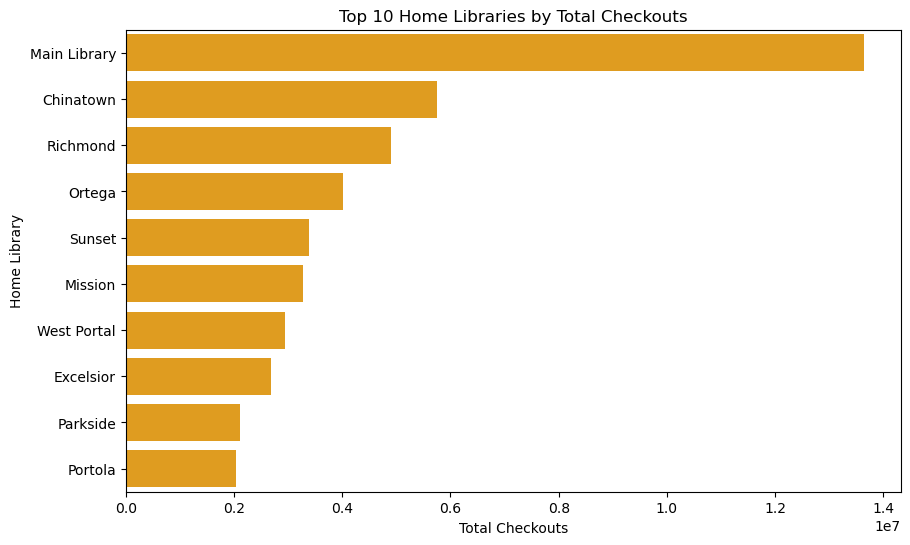

In [102]:
# Home Library vs Total Checkouts (Barplot for top 10 Only)
top_libs = (
    df_unique_records.groupby("Home Library Definition", as_index=False)
        .agg({"Total Checkouts": "sum"})
        .sort_values("Total Checkouts", ascending=False)
        .head(10)
)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_libs,
    x="Total Checkouts",
    y="Home Library Definition",
    color="orange"
)
plt.title("Top 10 Home Libraries by Total Checkouts")
plt.xlabel("Total Checkouts")
plt.ylabel("Home Library")
plt.show()

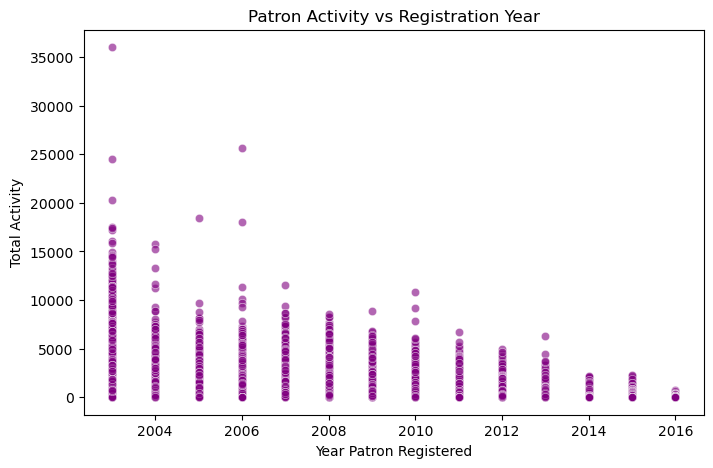

In [103]:
# Year Registered vs Activity (Scatter Plot)
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df_unique_records,
    x="Year Patron Registered",
    y="Total Activity",
    alpha=0.6,
    color='purple'
)
plt.title("Patron Activity vs Registration Year")
plt.show()

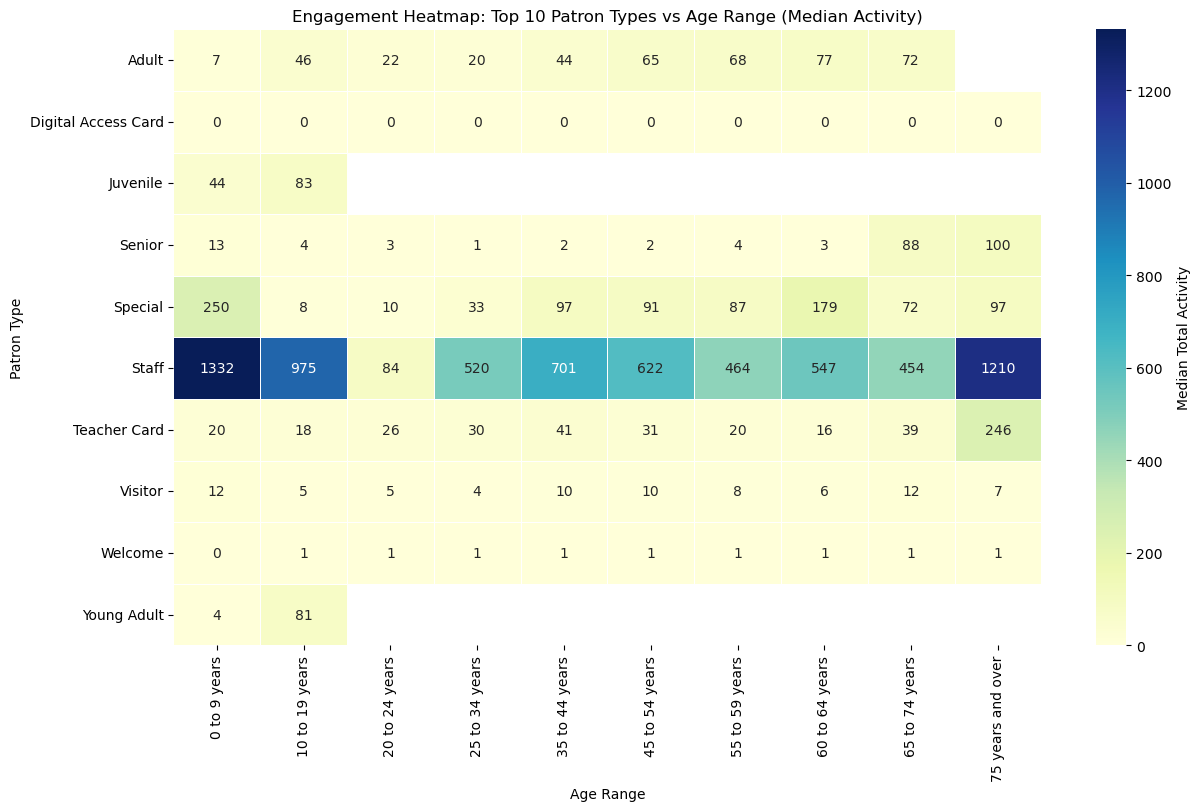

In [104]:
# Engagement Heatmap: Top 10 Patron Types vs Age Range (Median Activity)
# 1. Identify the Top 10 Patron Types by frequency
top_10_patron_types = df_unique_records['Patron Type Definition'].value_counts().nlargest(10).index

# 2. Filter the dataframe to include only these types
# Also filtering out 'Unknown' Age Range to keep the visualization clean
df_filtered = df_unique_records[
    (df_unique_records['Patron Type Definition'].isin(top_10_patron_types)) & 
    (df_unique_records['Age Range'] != 'Unknown')
]

# 3. Create the pivot table with filtered data
# We use 'median' instead of 'mean' to reduce the influence of extreme outliers
pivot_filtered = df_filtered.pivot_table(
    values="Total Activity",
    index="Patron Type Definition",
    columns="Age Range",
    aggfunc="median"
)

# 4. Plotting the Heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(
    pivot_filtered, 
    cmap="YlGnBu", 
    annot=True,          # Add numbers inside cells
    fmt=".0f",           # Format numbers to integers
    linewidths=.5,       # Add lines between cells for clarity
    cbar_kws={'label': 'Median Total Activity'}
)

plt.title("Engagement Heatmap: Top 10 Patron Types vs Age Range (Median Activity)")
plt.xlabel("Age Range")
plt.ylabel("Patron Type")
plt.show()

## Future Scope:

- This project can be extended by applying predictive modeling to identify high-engagement patrons.
- Advanced analysis such as clustering patrons by behavior or building interactive dashboards can provide deeper operational insights for library planning and resource allocation.